# Простая линейная регрессия

## Импортируем нужные библиотеки

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Загружаем данные

In [3]:
data = pd.read_csv('C:/study/data/365data/tasks/ML/1.01. Simple linear regression.csv')
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## Создаем регрессию

### Определяем зависимые и незавиимые переменные

In [5]:
y = data['GPA']
x1 = data ['SAT']

### Объясняем данные

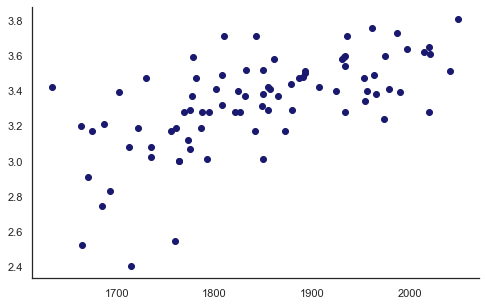

In [6]:
sns.set_style('white')
plt.figure(figsize = (8,5))
plt.scatter(x1, y, color = 'midnightblue')
sns.despine()
plt.show()

## Сама регрессия

In [7]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 21 Jul 2020   Prob (F-statistic):           7.20e-11
Time:                        17:33:45   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Таким образом, линия регрессии равна
yhat = 0.0017*x1 + 0.275

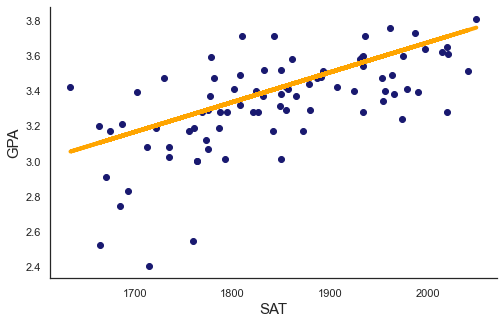

In [8]:
sns.set_style('white')
plt.figure(figsize = (8,5))
plt.scatter(x1, y, color = 'midnightblue')
yhat = 0.0017*x1 + 0.275
fig = plt.plot(x1,
               yhat,
               lw = 4,
               c = 'orange',
               label = 'regression line')
plt.xlabel('SAT', fontsize = 15)
plt.ylabel('GPA', fontsize = 15)
sns.despine()
plt.show()

#### Таким образом, лишь 40,6% выборки объясняются нашей моделью, что недостаточно.
#### Исправить ситуацию можно путем добавления дополнительных независимых переменных в модель.